<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-02-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative', 'totalTestResults']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative,totalTestResults
37,NY,316415,669496,985911.0
34,NJ,126744,148322,275066.0
21,MA,68087,246559,314646.0
16,IL,61499,257814,319313.0
5,CA,53616,662135,715751.0
41,PA,49267,191374,240641.0
24,MI,43754,168778,212532.0
10,FL,36078,392111,428189.0
47,TX,31548,359012,390560.0
20,LA,29340,146820,176160.0


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='GA'].groupby(['date'])

dfUSAPos = gbUSA[['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']].sum().reset_index().copy()
dfCAPos = gbCA[['positive', 'totalTestResults', 'death','positiveIncrease', 'deathIncrease']].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [108]:
dfUSAPos[-14:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
89,2020-04-20,776419,4038895.0,37913,25132.0,1689.0,0.673971
90,2020-04-21,802330,4186974.0,40471,25911.0,2558.0,0.696463
91,2020-04-22,830862,4501795.0,42508,28532.0,2037.0,0.721231
92,2020-04-23,862194,4693574.0,44385,31332.0,1877.0,0.748428
93,2020-04-24,896306,4925393.0,46251,34112.0,1866.0,0.778039
94,2020-04-25,932242,5196649.0,48069,35936.0,1818.0,0.809234
95,2020-04-26,959258,5403052.0,49164,27016.0,1095.0,0.832685
96,2020-04-27,981134,5593495.0,50327,21876.0,1163.0,0.851674
97,2020-04-28,1005592,5795728.0,52525,24458.0,2198.0,0.872905
98,2020-04-29,1033157,6026170.0,55225,27565.0,2700.0,0.896833


In [110]:
dfCAPos[-28:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,PCT
33,2020-04-06,7314,31274.0,229,667.0,18.0,0.255716
34,2020-04-07,8818,33713.0,329,1504.0,100.0,0.308300
35,2020-04-08,9901,38787.0,362,1083.0,33.0,0.346165
36,2020-04-09,10566,41085.0,379,665.0,17.0,0.369415
37,2020-04-10,11483,46147.0,416,917.0,37.0,0.401475
38,2020-04-11,12159,51715.0,428,676.0,12.0,0.425110
39,2020-04-12,12452,54453.0,433,293.0,5.0,0.435354
40,2020-04-13,13315,57021.0,464,863.0,31.0,0.465527
41,2020-04-14,14223,61795.0,501,908.0,37.0,0.497273
42,2020-04-15,14987,64090.0,552,764.0,51.0,0.523984


In [10]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-29,1033157,4993013,4832,54930.0,109690.0,9612.0,4093.0,4796.0,365.0,147484.0,55225,109690.0,6031002,6026170.0,6026170.0,2700.0,3382.0,202877.0,27565.0,230442.0
2020-04-30,1062134,5184558,2775,53793.0,111955.0,9486.0,4192.0,4712.0,373.0,154793.0,57316,111955.0,6249467,6246692.0,6246692.0,2091.0,2265.0,191545.0,28977.0,220522.0
2020-05-01,1095681,5456129,1639,52370.0,121748.0,9205.0,4300.0,4707.0,376.0,164015.0,59059,121748.0,6553449,6551810.0,6551810.0,1743.0,9793.0,271571.0,33547.0,305118.0
2020-05-02,1125719,5690628,1578,51734.0,123860.0,9403.0,4386.0,4845.0,375.0,175382.0,60710,123860.0,6817925,6816347.0,6816347.0,1651.0,2112.0,234499.0,30038.0,264537.0
2020-05-03,1152006,5901360,2812,50312.0,125796.0,9292.0,4502.0,4761.0,425.0,180152.0,61868,125796.0,7056178,7053366.0,7053366.0,1158.0,1936.0,210732.0,26287.0,237019.0


In [11]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-29,46500,556639,0,5011.0,0.0,1512.0,0.0,0.0,0.0,0.0,1887,0.0,603139,603139.0,603139.0,78.0,0.0,24062.0,1469.0,25531.0
2020-04-30,48917,576420,0,4981.0,0.0,1473.0,0.0,0.0,0.0,0.0,1982,0.0,625337,625337.0,625337.0,95.0,0.0,19781.0,2417.0,22198.0
2020-05-01,50442,604543,0,4706.0,0.0,1434.0,0.0,0.0,0.0,0.0,2073,0.0,654985,654985.0,654985.0,91.0,0.0,28123.0,1525.0,29648.0
2020-05-02,52197,634606,0,4722.0,0.0,1433.0,0.0,0.0,0.0,0.0,2171,0.0,686803,686803.0,686803.0,98.0,0.0,30063.0,1755.0,31818.0
2020-05-03,53616,662135,0,4734.0,0.0,1468.0,0.0,0.0,0.0,0.0,2215,0.0,715751,715751.0,715751.0,44.0,0.0,27529.0,1419.0,28948.0


In [12]:
rn = gbCA.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

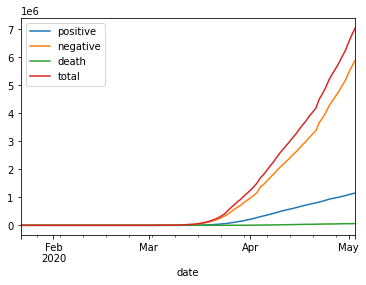

In [13]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [14]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-04-20,723605,34203
2020-04-21,751273,35884
2020-04-22,776907,37602
2020-04-23,800926,40073
2020-04-24,830053,42311
2020-04-25,860772,44053
2020-04-26,899281,46204
2020-04-27,931698,47980
2020-04-28,960916,49170


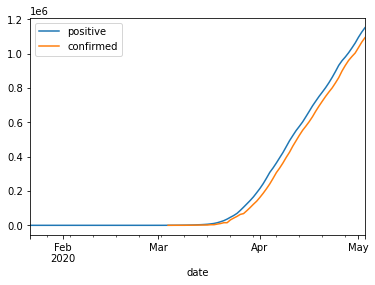

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [16]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-27,43464,509945,0,4878.0,0.0,1499.0,0.0,0.0,0.0,0.0,1755,0.0,553409,553409.0,553409.0,45.0,0.0,26025.0,1300.0,27325.0
2020-04-28,45031,532577,0,4983.0,0.0,1485.0,0.0,0.0,0.0,0.0,1809,0.0,577608,577608.0,577608.0,54.0,0.0,22632.0,1567.0,24199.0
2020-04-29,46500,556639,0,5011.0,0.0,1512.0,0.0,0.0,0.0,0.0,1887,0.0,603139,603139.0,603139.0,78.0,0.0,24062.0,1469.0,25531.0
2020-04-30,48917,576420,0,4981.0,0.0,1473.0,0.0,0.0,0.0,0.0,1982,0.0,625337,625337.0,625337.0,95.0,0.0,19781.0,2417.0,22198.0
2020-05-01,50442,604543,0,4706.0,0.0,1434.0,0.0,0.0,0.0,0.0,2073,0.0,654985,654985.0,654985.0,91.0,0.0,28123.0,1525.0,29648.0
2020-05-02,52197,634606,0,4722.0,0.0,1433.0,0.0,0.0,0.0,0.0,2171,0.0,686803,686803.0,686803.0,98.0,0.0,30063.0,1755.0,31818.0
2020-05-03,53616,662135,0,4734.0,0.0,1468.0,0.0,0.0,0.0,0.0,2215,0.0,715751,715751.0,715751.0,44.0,0.0,27529.0,1419.0,28948.0


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1132539
dead           66369
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    53347
dead          2180
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1132539
Spain              216582
Italy              209328
United Kingdom     183500
France             168518
Germany            164967
Turkey             124375
Russia             124054
Brazil              97100
Iran                96448
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [25]:
dfState.loc['FL'].head(7)

,date,positive,death,current_total,pct
state,,,,,
FL,2020-05-03,36078,1403,36078,1.000000
FL,2020-05-02,35463,1388,36078,0.982954
FL,2020-05-01,34728,1314,36078,0.962581
FL,2020-04-30,33690,1290,36078,0.933810
FL,2020-04-29,33193,1240,36078,0.920034
FL,2020-04-28,32846,1154,36078,0.910416
FL,2020-04-27,32138,1101,36078,0.890792


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

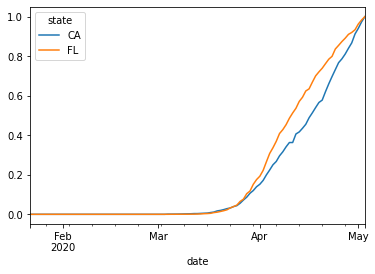

In [27]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

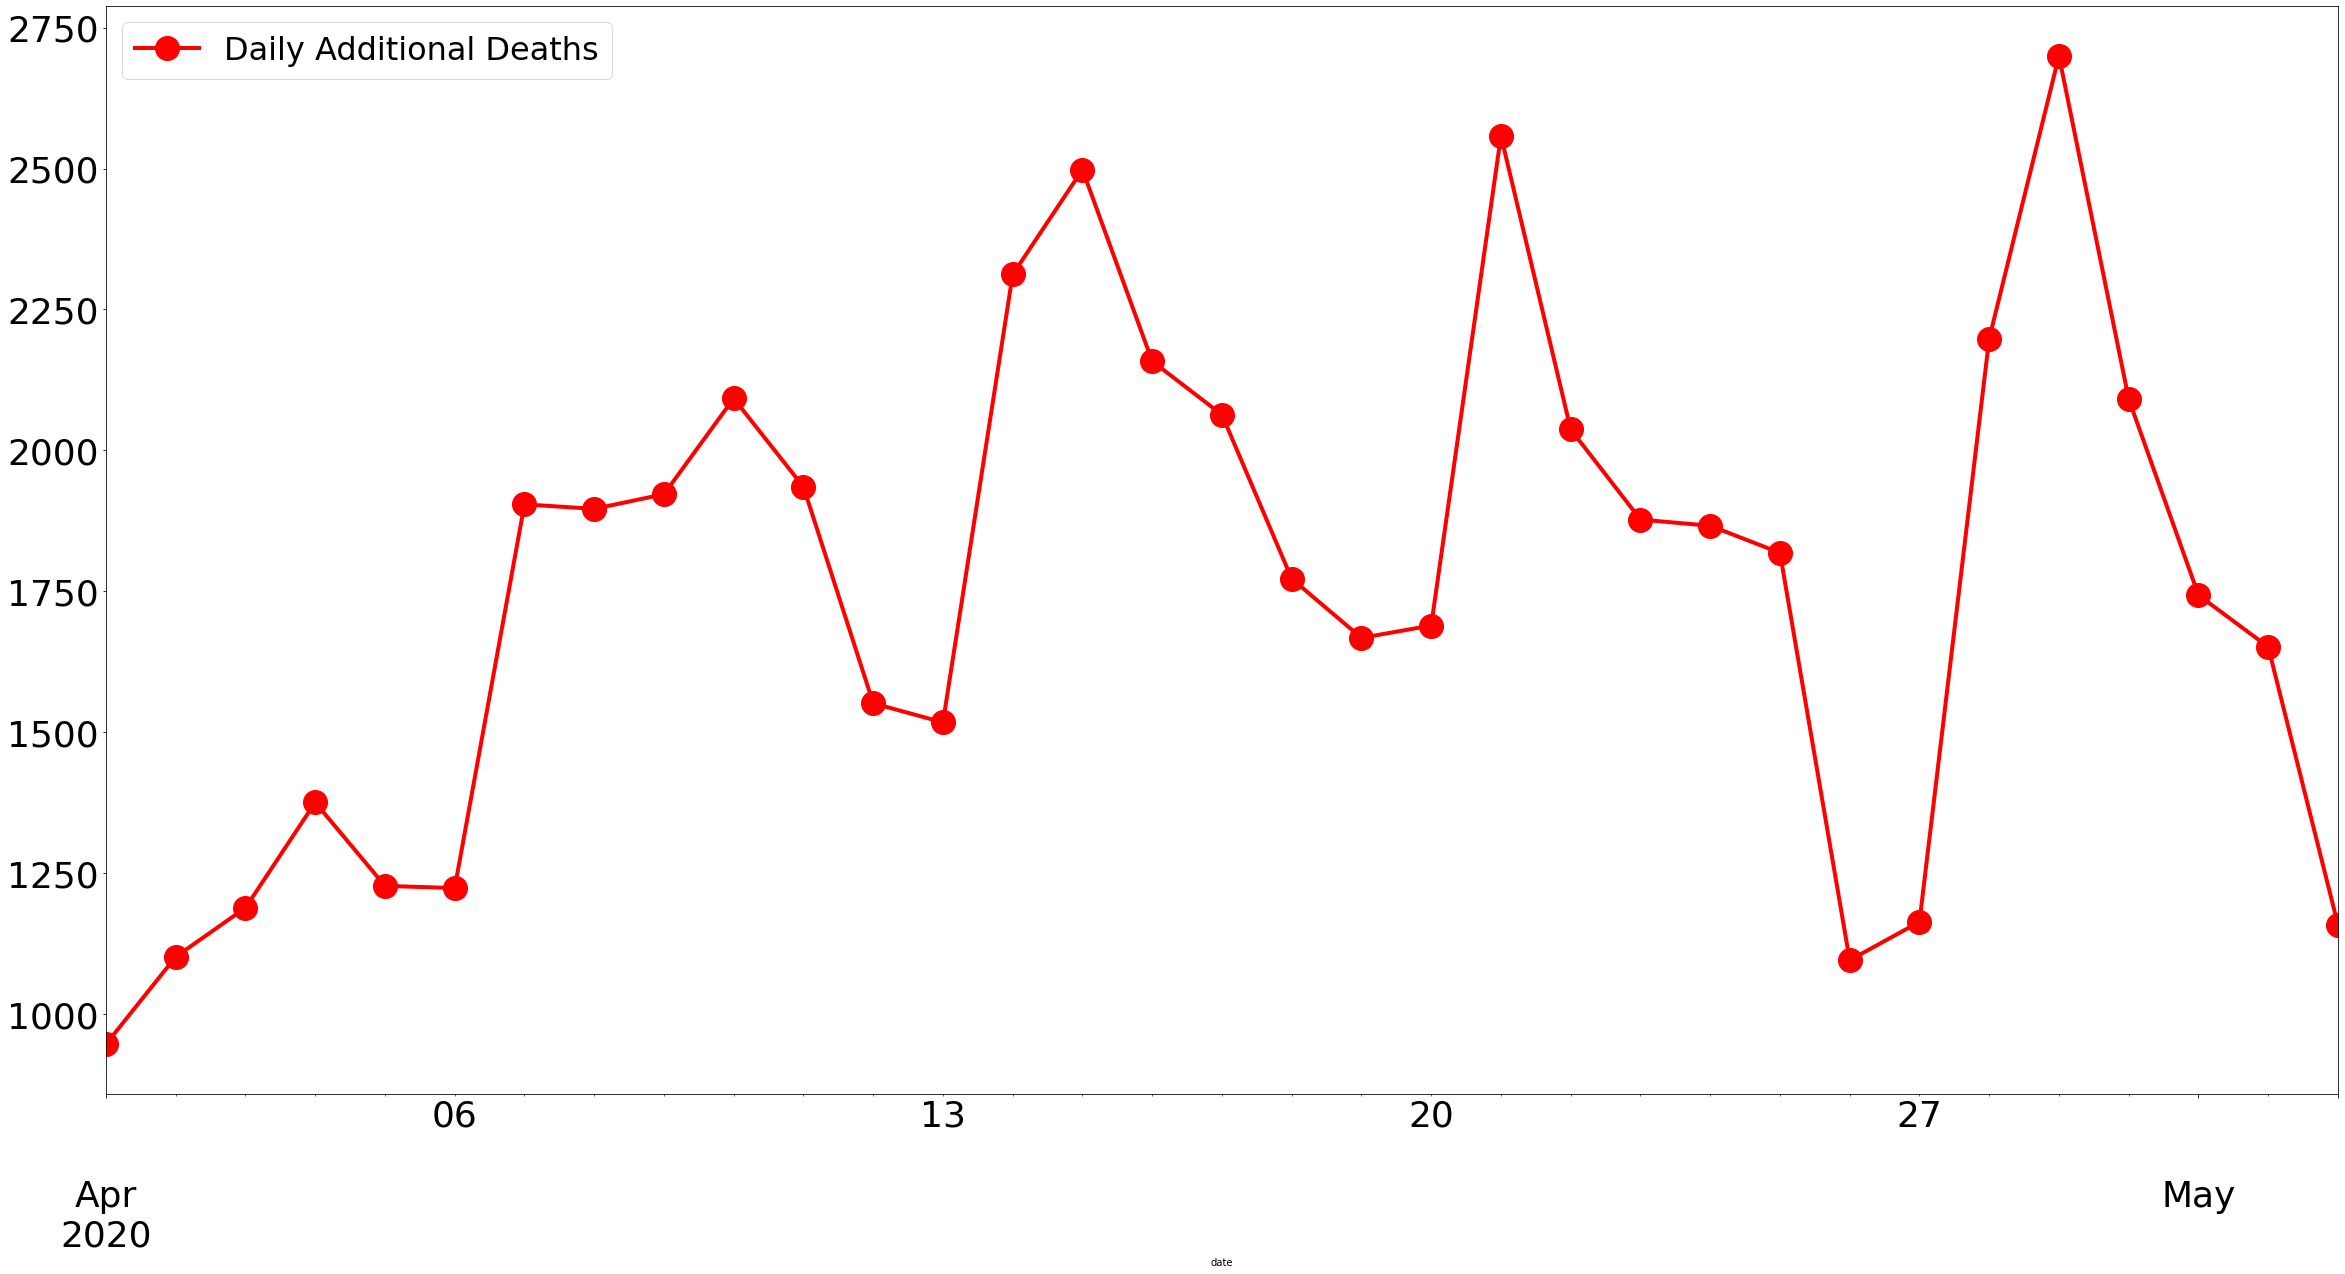

In [119]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


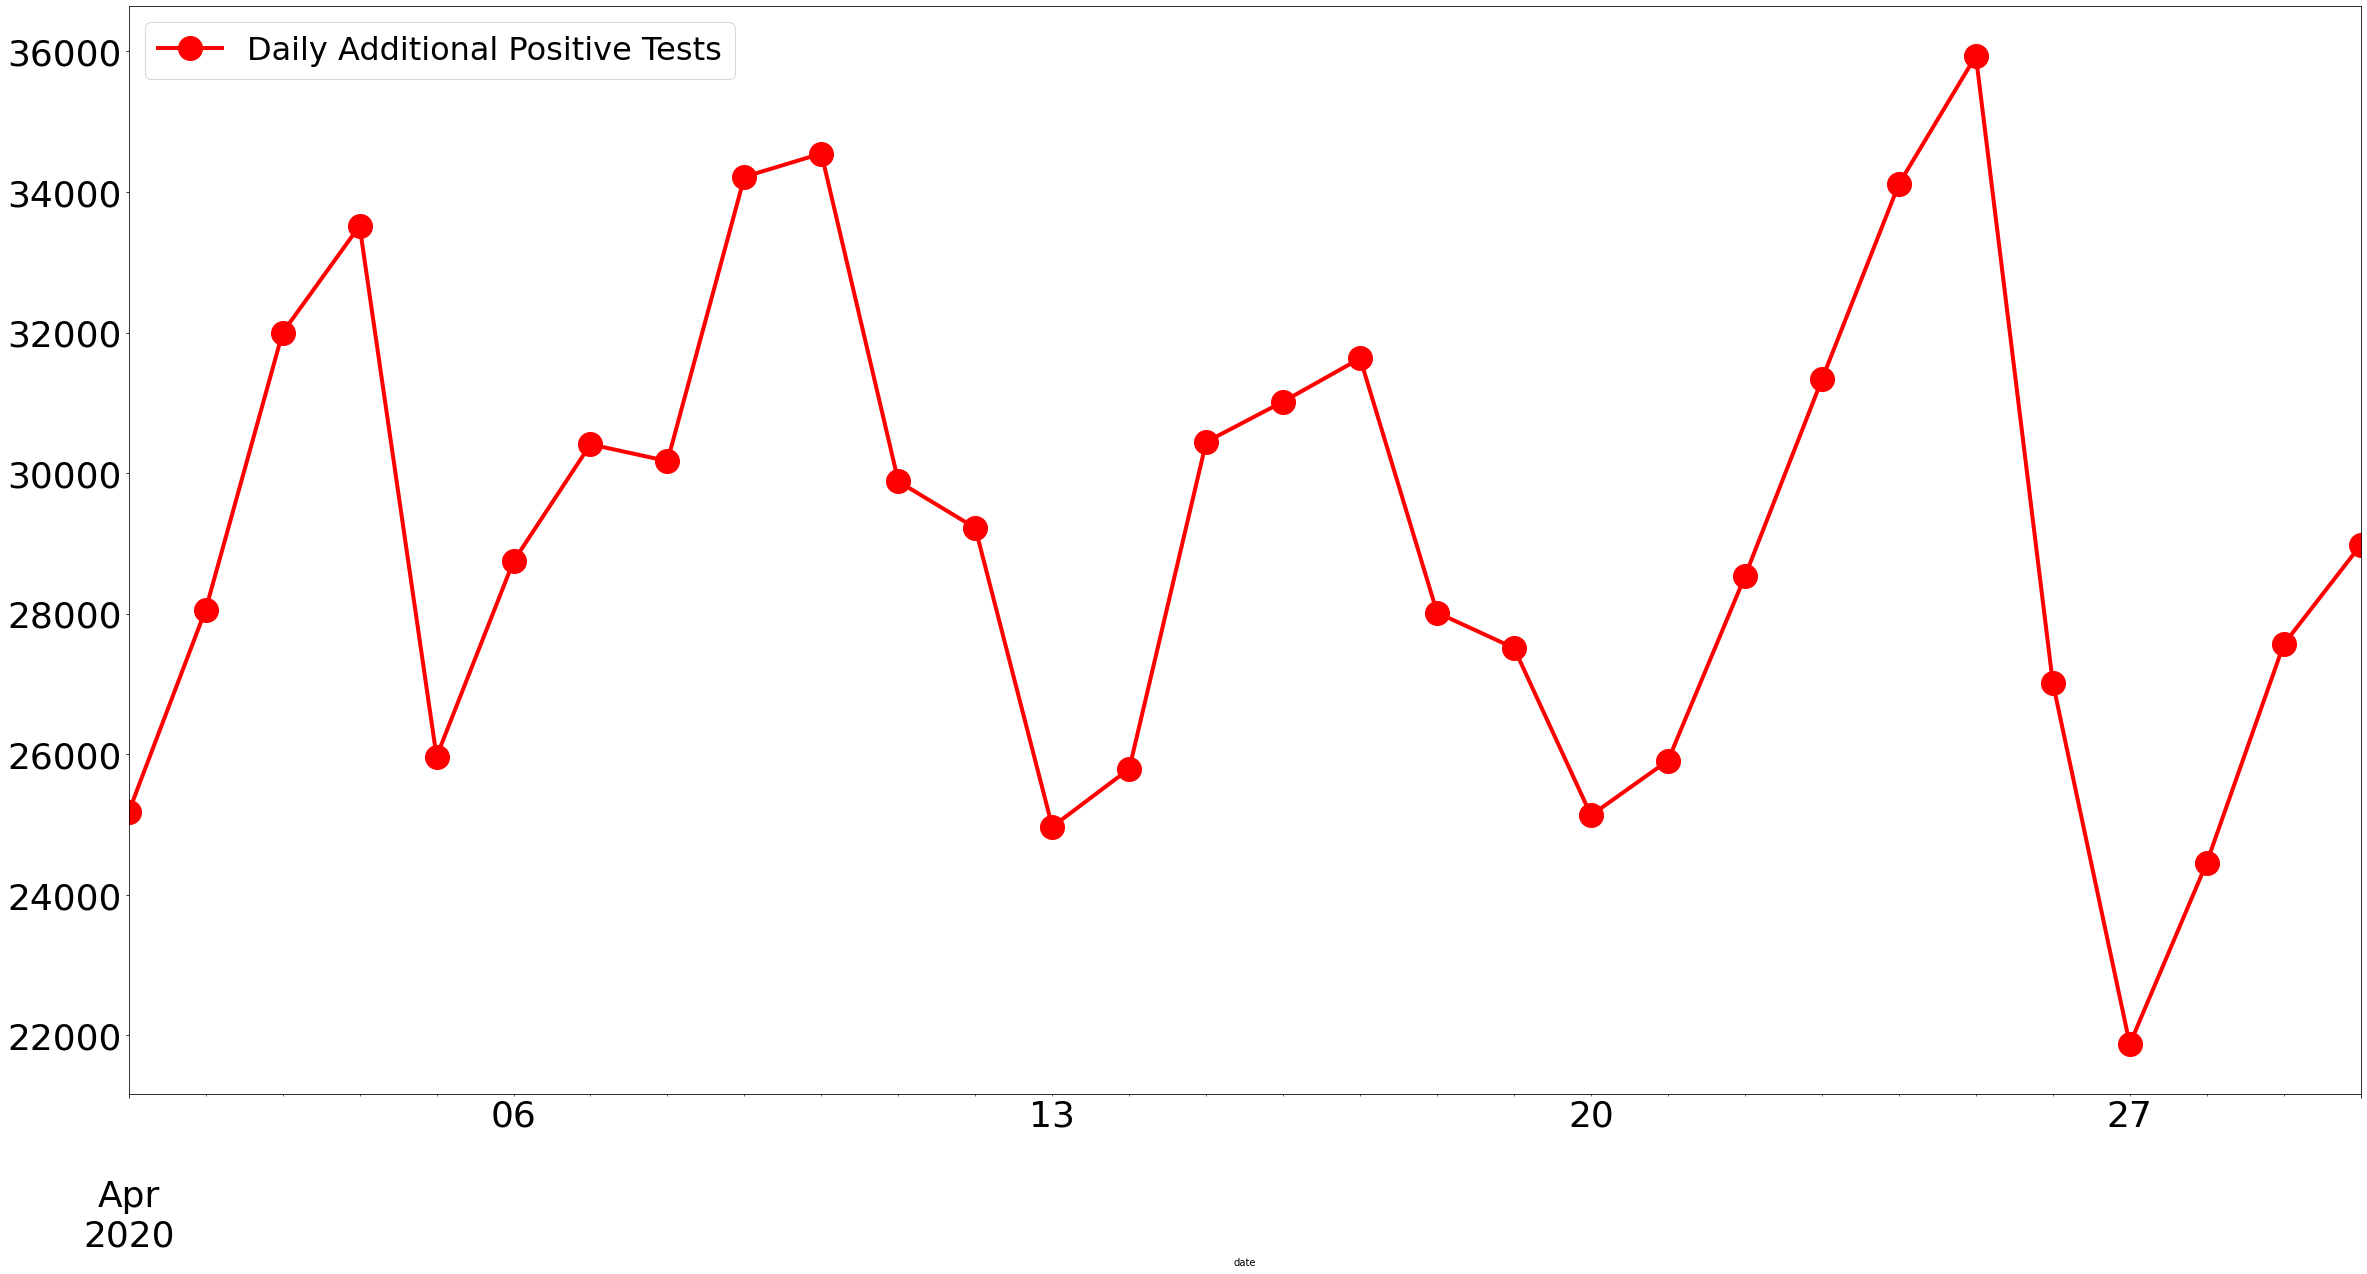

In [140]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


In [75]:
dfDoW.sum()



,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,6238.0,13572.0,681630.0,134210.0,815840.0
1,10020.0,16018.0,707766.0,143680.0,851446.0
2,10340.0,19383.0,889040.0,157190.0,1046230.0
3,9483.0,19449.0,816126.0,175640.0,991766.0
4,9401.0,26391.0,942545.0,191265.0,1133810.0
5,9048.0,19260.0,1015659.0,184185.0,1199844.0
6,7338.0,14506.0,847561.0,165722.0,1013283.0


In [65]:
dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]


,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,
2020-05-03,0.0,0.0,176.0,3.0,179.0
2020-05-03,2.0,12.0,0.0,291.0,291.0
2020-05-03,3.0,13.0,1249.0,59.0,1308.0
2020-05-03,0.0,0.0,0.0,0.0,0.0
2020-05-03,14.0,9.0,2846.0,276.0,3122.0
...,...,...,...,...,...
2020-01-26,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0


In [31]:
dfByWeekYear.sum()[:-1]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202004,0.0,0.0,0.0,0.0,0.0
202005,0.0,0.0,0.0,0.0,0.0
202006,0.0,0.0,0.0,1.0,1.0
202007,0.0,0.0,0.0,0.0,0.0
202008,0.0,0.0,0.0,0.0,0.0
202009,8.0,0.0,81.0,28.0,109.0
202010,23.0,0.0,2821.0,595.0,3416.0
202011,46.0,0.0,30203.0,4114.0,34317.0
202012,359.0,2498.0,179297.0,31482.0,210779.0
202013,2091.0,13766.0,497952.0,107963.0,605915.0


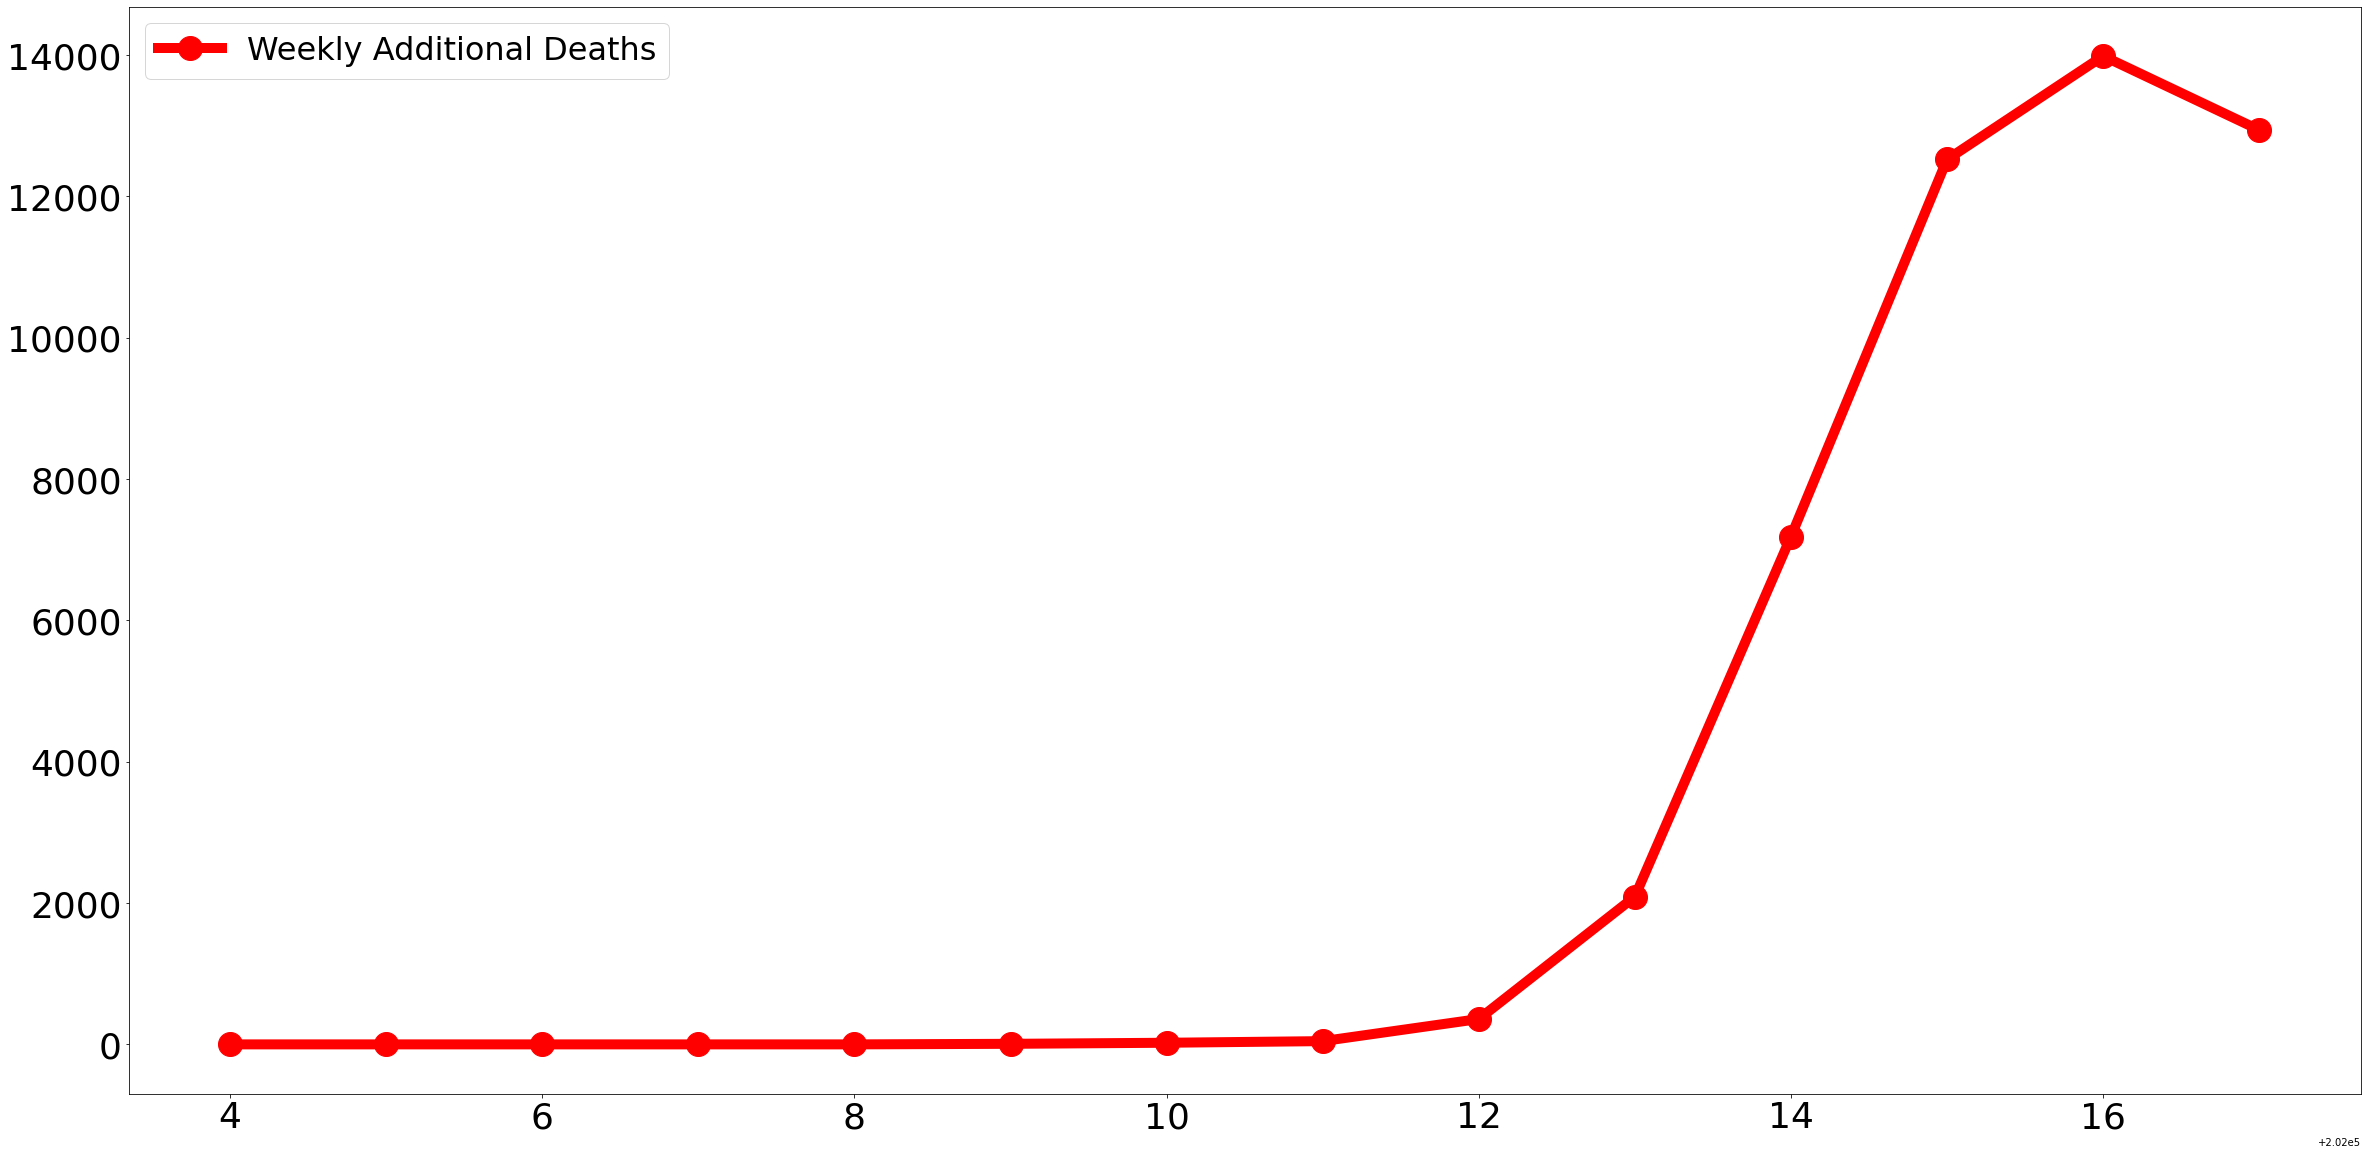

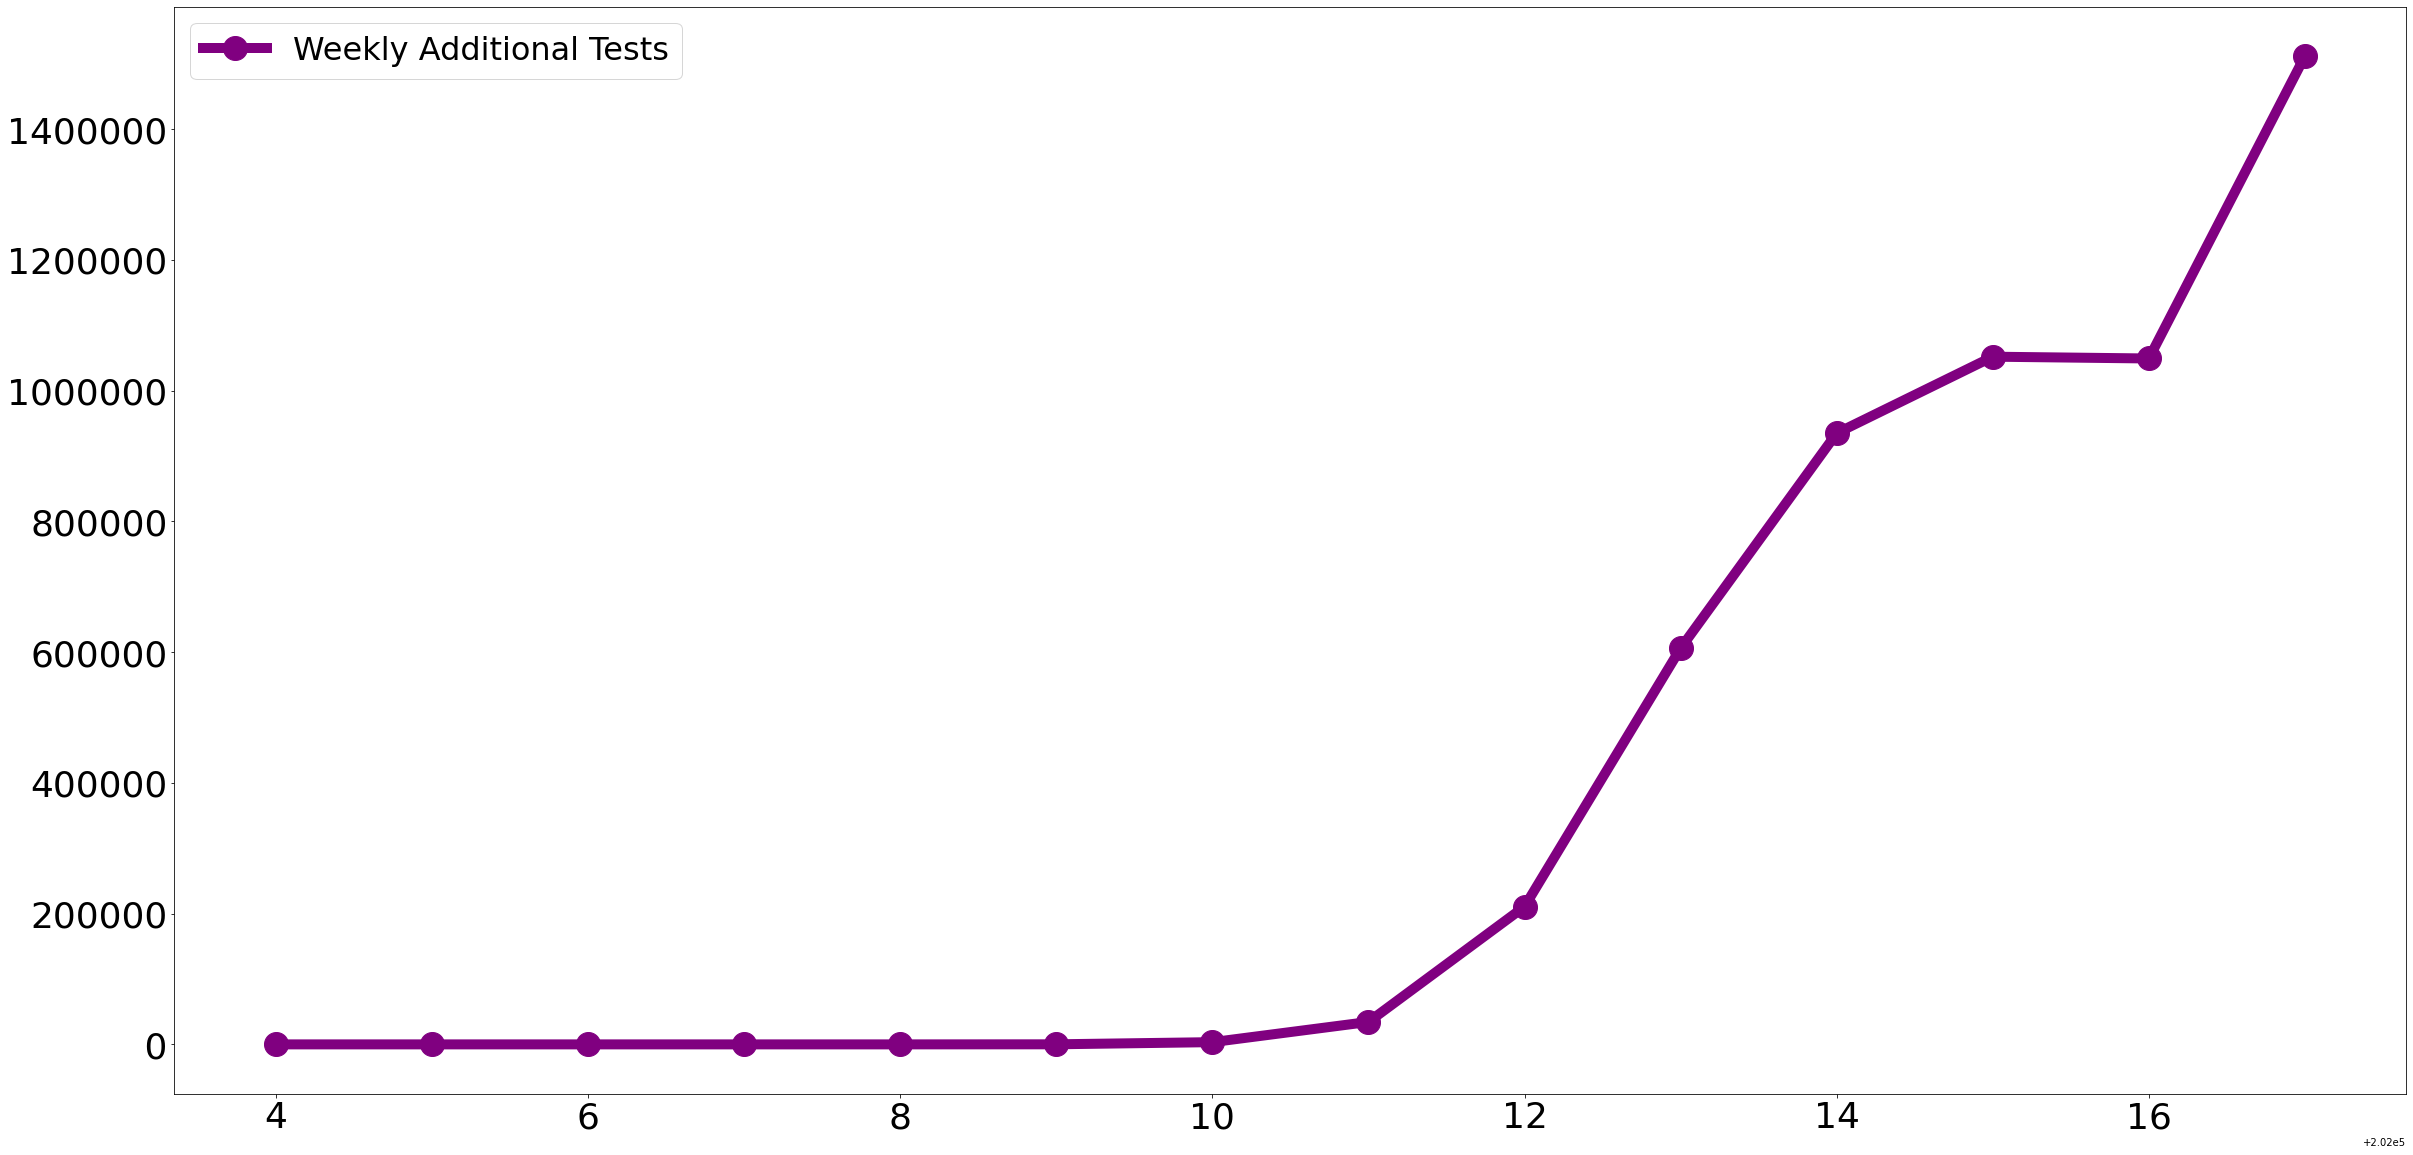

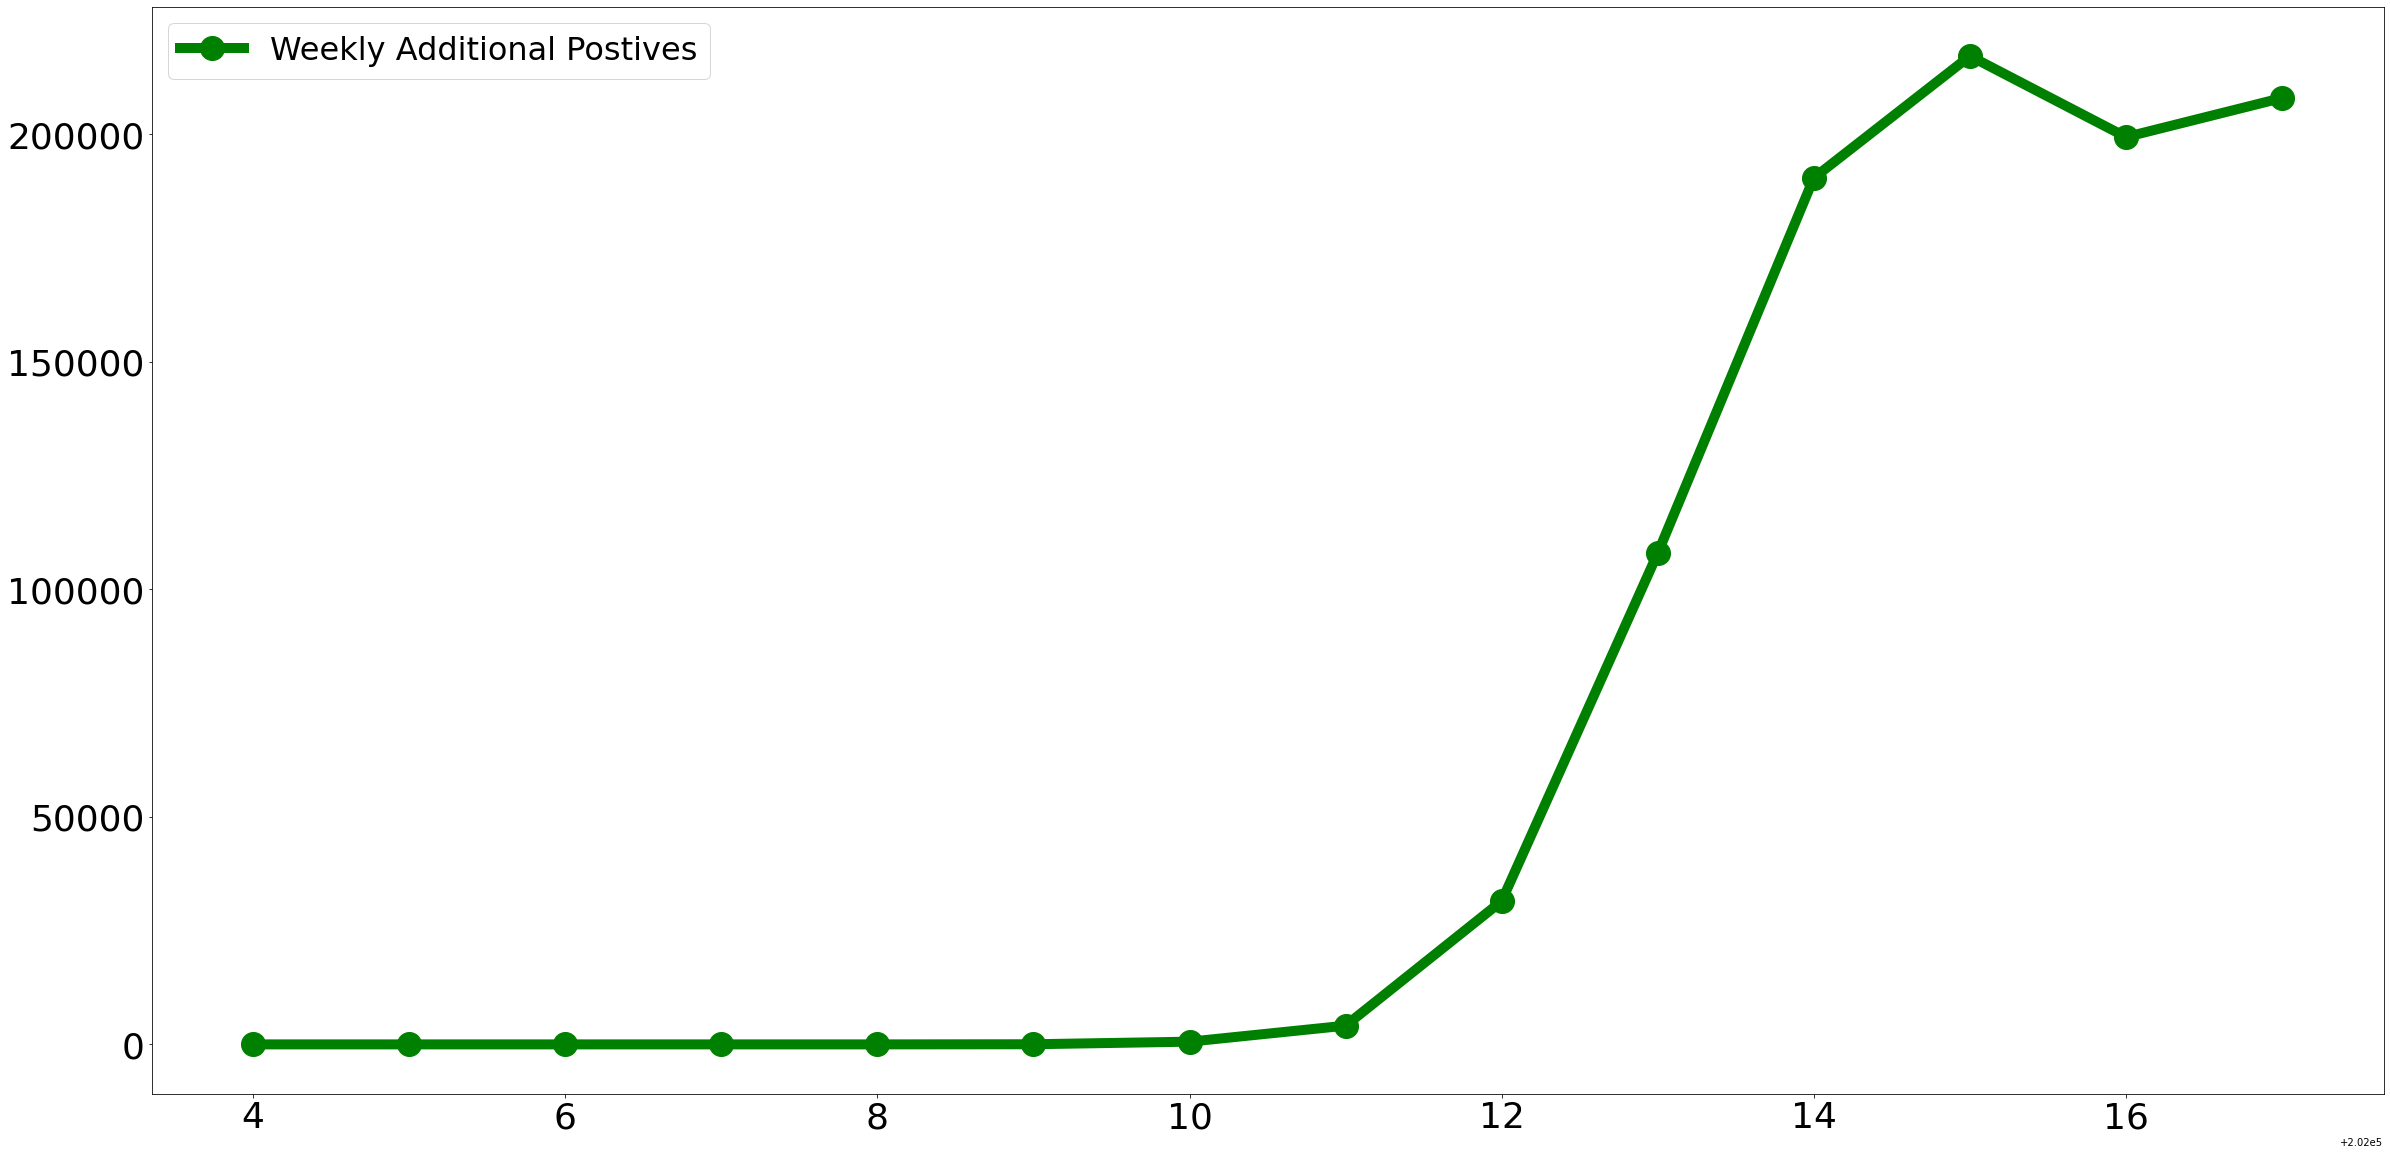

In [136]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

In [90]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,index,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease


In [34]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=3)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .7)].sort_values(by='pct')


,state,date,positive,death,current_total,pct


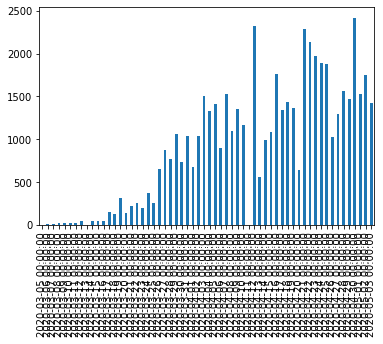

In [35]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [38]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive    1152006
negative    5901360
pending        2812
death         61868
total       7056178
dtype: int64
Current Infection Rate 16.326204%
Percentage of US affected: 0.369813%
Observed CFR: 5.370458%
Percentage of US tested/affected: 2.167696%
Projected affected by cir = 53,589,054
Projected killed = 2,877,978


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [46]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.626515,5.068023
NJ,1.426945,3.096826
MA,0.987841,4.565047
RI,0.894596,6.789659
CT,0.821449,2.874748
DC,0.710734,3.273402
LA,0.631131,3.789370
DE,0.534832,2.437654
IL,0.485321,2.519867


In [47]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 2.148847%


In [48]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [50]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14919 entries, 0 to 14918
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  14730 non-null  object 
 1   location                  14919 non-null  object 
 2   date                      14919 non-null  object 
 3   total_cases               14919 non-null  int64  
 4   new_cases                 14919 non-null  int64  
 5   total_deaths              14919 non-null  int64  
 6   new_deaths                14919 non-null  int64  
 7   total_cases_per_million   14629 non-null  float64
 8   new_cases_per_million     14629 non-null  float64
 9   total_deaths_per_million  14629 non-null  float64
 10  new_deaths_per_million    14629 non-null  float64
 11  total_tests               3747 non-null   float64
 12  new_tests                 3347 non-null   float64
 13  total_tests_per_thousand  3747 non-null   float64
 14  new_te

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [53]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    6816347.0
RUS    4099999.0
DEU    2547052.0
ITA    2108837.0
ESP    1351130.0
         ...    
PRY      10327.0
CRI       9593.0
ZWE       8314.0
MMR       8281.0
BOL       7556.0
Name: total_tests, Length: 82, dtype: float64

In [54]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 24760246
Total tests done in USA : 6816347
How many more times has the world tested more than the US: 3.6


In [55]:
dfOwidLatest[isUSA].sum()

location                                                  United States
date                                                         2020-05-02
total_cases                                                     1103781
new_cases                                                         33955
total_deaths                                                      65068
new_deaths                                                         2062
total_cases_per_million                                         3334.66
new_cases_per_million                                           102.582
total_deaths_per_million                                        196.578
new_deaths_per_million                                             6.23
total_tests                                                 6.81635e+06
new_tests                                                        264537
total_tests_per_thousand                                         20.593
new_tests_per_thousand                                          

In [56]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']
dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-14:]

,new_cases,new_deaths
date,,
2020-04-20,24601,1772
2020-04-21,28065,1857
2020-04-22,37289,2524
2020-04-23,17588,1721
2020-04-24,26543,3179
2020-04-25,21352,1054
2020-04-26,48529,2172
2020-04-27,26857,1687
2020-04-28,22541,1369


In [57]:
dfOwidUSA.set_index('date')

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
date,,,,,,,,,,,,,,,
2019-12-31,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-01,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-02,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-03,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2020-01-04,USA,United States,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29,USA,United States,1012583,24132,58355,2110,3059.139,72.906,176.298,6.375,6026170.0,230442.0,18.206,0.696,inconsistent units (COVID Tracking Project)
2020-04-30,USA,United States,1039909,27326,60966,2611,3141.694,82.555,184.186,7.888,6246692.0,220522.0,18.872,0.666,inconsistent units (COVID Tracking Project)
2020-05-01,USA,United States,1069826,29917,63006,2040,3232.077,90.383,190.349,6.163,6551810.0,305118.0,19.794,0.922,inconsistent units (COVID Tracking Project)
